<div align='center'><a href='https://linktr.ee/fea.dev'/ style='display:inline-block'>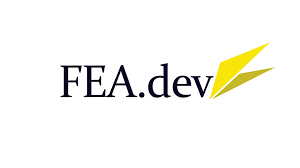<a/><div/>

# Sumário

* [0. Case Avançado IA](#chapter0)

* [1. Entendimento do problema](#chapter1)

* [2. Entendimento dos dados](#chapter2)

* [3. Pré-Processamento](#chapter3)

    * [Primeira visualização dos dfs](#section_3_1)

    * [Valores faltantes](#section_3_2)

    * [Verificaremos se há linhas duplicadas nos datas frames](#section_3_3)
    
    * [Manipulação e criação de variáveis](#section_3_4)
    
    * [Verificação de outliers](#section_3_5)

* [4. Modelagem](#chapter4)

    * [Modelo Decision Tree Regression](#section_4_1)
        
        * [Vendas x Temperatura](#section_4_1_1)
        
            * [Medidas de avaliação do modelo Vendas x Temperatura](#section_4_1_1_1)
        
        * [Vendas x Lojas](#section_4_1_2)
        
            * [Medidas de avaliação do modelo Vendas x Lojas](#section_4_1_1_2)
            
        * [Modelo Random Forest Regression](#section_4_2)
        
            * [Vendas x Temperatura](#section_4_2_1)
            
            * [Vendas x Lojas](#section_4_2_2)

            * [Adição de Variáveis](#section_4_2_3)
            
                * [Pré-tratamento para a adição](#section_4_2_3_1)
                
                * [Modelo Random Forest Regression usando todas as variáveis do conjunto de dados](#section_4_2_3_2)
 
* [5. Avaliação](#chapter5)

* [6. Referências](#chapter6)
        
            

<a class="anchor" id="chapter0"></a>
# <font color=blue|blue|red>Case Avançado IA</font>

Estamos muito felizes pela sua escolha com o case de inteligência artificial. Esperamos que você aprenda bastante conosco.  

Caso não tenha lido as orientações no nosso [repositório do github](https://github.com/fea-dev-usp/Segunda_Fase_PS_2023), o faça imediatamente! É fundamental para teu bom desempenho no case.

Rode a célula abaixo e entre em contato com um de nossos monitores no WhatsApp em caso de dúvida:

In [1]:
import random
lista_contatos = ["Carlos Silva (+55 19 99696-8315)",
                  "Guilherme Oliveira (+55 11 96161-0064)",
                  "Gustavo Yuji (+55 13 99760-0375)",
                  "Maria Raquel (+55 11 96469-1466)"]

print(f'Entrar em contato com {lista_contatos[random.randint(0, 3)]}.')

Entrar em contato com Maria Raquel (+55 11 96469-1466).


**As variáveis:
Dataset Stores**
* Store - ID da loja
* Type - Tipo baseado no tamanho da loja
* Size - Tamanho da loja

**Dataset Features**
* Store - ID da loja
* Date - Data da semana
* Temperature - Temperatura média na região
* Fuel_price - Preço do combustível na região
* Markdown - Promoções/remarcações - disponível apenas depois de Nov/21
* CPI - Inflação no período
* Unemployment - Taxa de desemprego
* isHoliday - Se a semana é um feriado ou não

**Dataset Sales**
* Store - ID da loja
* Dept - O número do departamento
* Date - Data da semana
* Weekly_sales - Vendas por departamento em cada loja
* isHoliday - Se a semana é um feriado ou não


**Passo a passo sugerido do case:**

*Nota: pode acontecer de algum subtópico nõo ser aplicável, mas como regra geral, é sempre importante ao menos se questionar sobre eles em toda análise*
1. Entendimento do problema
* Qual é o problema? Qual a causa (ou possível causa)?
* Por que resolver?
* Qual pode ser uma boa métrica para avaliação do sucesso?

2. Entendimento dos dados
* Quais os dados disponíveis e que informações podemos tirar deles?
* Qual a variável target?

3. Pré-processamento
* Limpeza de dados
* Criação de outras variáveis
* Normalização
* Padronização
* Lidar com outliers
* Valores faltantes

4. Modelagem
* Seleção, treinamento e teste de um algoritmo
* Tunagem de hiperparâmetros
* Documentar motivo da escolha

5. Avaliação
* Analisar as métricas
* Formular hipóteses de como o seu modelo poderia melhorar e iterar (documentar essas hipóteses)

# <font color=red>Resolução do case</font>

<a class="anchor" id="chapter1"></a>
## 1. Entendimento do problema
    a) Problema: fornecer uma previsão de vendas por loja. 
    b) Possível cenário: empresa varejista que deseja abrir novas lojas, porém não sabe que tipo de loja abrir, então decidirá com base na previsão obtida.
    c) Obter um medidor de sucesso para nossa previsão, como um índice de acurácia ou o cálculo da estatítica R^2, e depois interpretar o resultado.
   

<a class="anchor" id="chapter2"></a>
## 2. Entedimento dos dados
    a) Observando os data frames, vemos que sales dá uma informação relevante para nossa análise: Weekly_Sales, isto é, uma série temporal das vendas semanais de cada loja (Store). Esse data frame também informa o departamento da loja (Dept), a data de coleta (Date), e se essa data era feriado ou não (IsHoliday). 
    Já features nos informa o quanto de desconto (MarkDown) cada loja (Store) deu no período, dividindo o tipo de desconto em 5. Também fornece a temperatura (Temperature), o preço do combustível (Fuel_Price), o nível de inflação (CPI), e a taxa de desemprego (Unemployment) para cada dia (Date), assim como se era feriado ou não (IsHoliday).
    Essas variáveis poderão ser úteis para prever o nível de vendas por loja.
    Stores nos traz menos informações: apenas o tipo (Type) de cada loja, que pode ser "A", "B" ou "C", e o tamanho (Size).
    b) A variável target é Weekly_Sales, já que queremos fazer uma previsão de vendas para cada loja.
   

<a class="anchor" id="chapter3"></a>
## 3. Pré-processamento
    Agora daremos início ao tratamento dos dados.

<a class="anchor" id="section_3_1"></a>
### Primeira visualização dos dfs

In [28]:
# Importação das bibliotecas que utilizaremos em nosso projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [41]:
# Em qual diretório estamos trabalhando

print(f"diretório em que estamos trabalhando: {os.getcwd()}")

diretório em que estamos trabalhando: C:\Users\luisz\Downloads\Avançado - Inteligência Artificial


In [150]:
# Importação dos dados como data frames

stores = pd.read_csv("stores data-set.csv")
features = pd.read_csv("Features data set.csv")
sales = pd.read_csv("sales data-set.csv")

In [151]:
# Observação das 5 primeiras linhas de cada data frame:

In [152]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [153]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [154]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [155]:
#veremos as informações de cada df

In [156]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [157]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [158]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


<a class="anchor" id="section_3_2"></a>
### Valores faltantes 

In [159]:
#verificação se há valores nulos para cada df

In [160]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [161]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [162]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [163]:
# vemos que há valores NaN nas colunas de MarkDown de features, portanto os substituíremos por zeros  (assumiremos que não houve desconto)
# criaremos uma lista com o nome das colunas de MarkDown para facilitar
colunas_markdown = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
features[colunas_markdown] = features[colunas_markdown].fillna(0)

features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [164]:
# há valores NaN na coluna CPI de features, portanto os substituíremos pelo valor anterior não nulo,
# isto é, a técnica forward fill. Podemos fazer isso pois a variável CPI diz respeito ao índice de inflação, que possui uma variância
# insiginificante de dia para dia

features["CPI"].fillna(method ="ffill", inplace = True)

features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,NaN,False


In [165]:
# há valores NaN na coluna Unemployment de features, portanto os substituíremos pelo valor anterior não nulo,
# isto é, a técnica forward fill. Podemos fazer isso pois a variável Unemployment diz respeito ao índice de desemprego,
# que possui uma variância insiginificante de dia para dia

features["Unemployment"].fillna(method ="ffill", inplace = True)

features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False


In [166]:
# não devemos mais ter valores NaN em features
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

<a class="anchor" id="section_3_3"></a>
### Verificaremos se há linhas duplicadas nos datas frames

In [170]:
# se a soma for 0, temos que não há linhas duplicadas em stores
sum(stores.duplicated())

0

In [171]:
# se a soma for 0, temos que não há linhas duplicadas em features
sum(features.duplicated())

0

In [172]:
# se a soma for 0, temos que não há linhas duplicadas em sales
sum(sales.duplicated())

0

<a class="anchor" id="section_3_4"></a>
### Manipulação e criação de variáveis

In [167]:
#tornaremos a coluna IsHoliday de features, que assume valores booleanos, em 0 ou 1, para trabalhar com ela mais facilmente no futuro

features["IsHoliday"] = features["IsHoliday"].replace({False: 0, True: 1})

features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,0
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,0
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,0
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,0


In [168]:
#tornaremos a coluna IsHoliday de sales, que assume valores booleanos, em 0 ou 1, para trabalhar com ela mais facilmente no futuro

sales["IsHoliday"] = sales["IsHoliday"].replace({False: 0, True: 1})

sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,0
1,1,1,12/02/2010,46039.49,1
2,1,1,19/02/2010,41595.55,0
3,1,1,26/02/2010,19403.54,0
4,1,1,05/03/2010,21827.90,0
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0
421566,45,98,05/10/2012,628.10,0
421567,45,98,12/10/2012,1061.02,0
421568,45,98,19/10/2012,760.01,0


In [175]:
# como não temos informações sobre o significado de cada tipo de MarkDown, uniremos os cinco em uma só coluna: MarkDown

features["MarkDown"] = features[colunas_markdown].sum(axis=1)

features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MarkDown
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,0.00
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,0.00
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,0.00
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,0.00
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,0,11439.98
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,0,19254.20
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,0,8598.17
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,0,5635.21


In [176]:
# como não usaremos as colunas de MarkDown1 a MarkDown5, iremos eliminá-las

for i in range(1,5+1):
    del features[f"MarkDown{i}"]
    
features

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown
0,1,05/02/2010,42.31,2.572,211.096358,8.106,0,0.00
1,1,12/02/2010,38.51,2.548,211.242170,8.106,1,0.00
2,1,19/02/2010,39.93,2.514,211.289143,8.106,0,0.00
3,1,26/02/2010,46.63,2.561,211.319643,8.106,0,0.00
4,1,05/03/2010,46.50,2.625,211.350143,8.106,0,0.00
...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,193.589304,8.335,0,11439.98
8186,45,05/07/2013,77.50,3.614,193.589304,8.335,0,19254.20
8187,45,12/07/2013,79.37,3.614,193.589304,8.335,0,8598.17
8188,45,19/07/2013,82.84,3.737,193.589304,8.335,0,5635.21


In [188]:
# vemos que, em sales, temos os valores das vendas semanais, porém ela está divida em cada departamento para cada loja

sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,0
1,1,1,12/02/2010,46039.49,1
2,1,1,19/02/2010,41595.55,0
3,1,1,26/02/2010,19403.54,0
4,1,1,05/03/2010,21827.90,0
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0
421566,45,98,05/10/2012,628.10,0
421567,45,98,12/10/2012,1061.02,0
421568,45,98,19/10/2012,760.01,0


In [197]:
# uniremos os dados por loja em um novo df, assim teremos os valores das vendas semanais total para cada loja,
# ignorando assim a informação do departamento, que não nos é útil

columns_to_keep = ['Store', 'Date', 'IsHoliday']

sales_tot = sales.groupby(columns_to_keep, sort=False)['Weekly_Sales'].sum().reset_index()

sales_tot

,Store,Date,IsHoliday,Weekly_Sales
0,1,05/02/2010,0,1643690.90
1,1,12/02/2010,1,1641957.44
2,1,19/02/2010,0,1611968.17
3,1,26/02/2010,0,1409727.59
4,1,05/03/2010,0,1554806.68
...,...,...,...,...
6430,45,28/09/2012,0,713173.95
6431,45,05/10/2012,0,733455.07
6432,45,12/10/2012,0,734464.36
6433,45,19/10/2012,0,718125.53


In [206]:
# Para podermos fazer nossa análise, uniremos os df's sales e features
# Podemos fazer isso pois deixamos as variáveis de interesse (Temperature, Fuel_Price, CPI, Unemployment, IsHoliday, MarkDown) (IsHoliday, Weekly_Sales)
# em função de Store e Date

sales_tot_features = pd.merge(sales_tot, features, how='inner', on=['Store', 'Date'])
sales_tot_features

,Store,Date,IsHoliday_x,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,MarkDown
0,1,05/02/2010,0,1643690.90,42.31,2.572,211.096358,8.106,0,0.00
1,1,12/02/2010,1,1641957.44,38.51,2.548,211.242170,8.106,1,0.00
2,1,19/02/2010,0,1611968.17,39.93,2.514,211.289143,8.106,0,0.00
3,1,26/02/2010,0,1409727.59,46.63,2.561,211.319643,8.106,0,0.00
4,1,05/03/2010,0,1554806.68,46.50,2.625,211.350143,8.106,0,0.00
...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,0,713173.95,64.88,3.997,192.013558,8.684,0,9468.01
6431,45,05/10/2012,0,733455.07,64.89,3.985,192.170412,8.667,0,9659.00
6432,45,12/10/2012,0,734464.36,54.47,4.000,192.327265,8.667,0,6554.03
6433,45,19/10/2012,0,718125.53,56.47,3.969,192.330854,8.667,0,3982.42


In [208]:
# vemos que há duas colunas IsHoliday, portanto iremos deletar IsHoliday_y e renomear a que resta para IsHoliday

del sales_tot_features['IsHoliday_y']

sales_tot_features = sales_tot_features.rename(columns={'IsHoliday_x': 'IsHoliday'})

sales_tot_features

,Store,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown
0,1,05/02/2010,0,1643690.90,42.31,2.572,211.096358,8.106,0.00
1,1,12/02/2010,1,1641957.44,38.51,2.548,211.242170,8.106,0.00
2,1,19/02/2010,0,1611968.17,39.93,2.514,211.289143,8.106,0.00
3,1,26/02/2010,0,1409727.59,46.63,2.561,211.319643,8.106,0.00
4,1,05/03/2010,0,1554806.68,46.50,2.625,211.350143,8.106,0.00
...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,0,713173.95,64.88,3.997,192.013558,8.684,9468.01
6431,45,05/10/2012,0,733455.07,64.89,3.985,192.170412,8.667,9659.00
6432,45,12/10/2012,0,734464.36,54.47,4.000,192.327265,8.667,6554.03
6433,45,19/10/2012,0,718125.53,56.47,3.969,192.330854,8.667,3982.42


<a class="anchor" id="section_3_5"></a>
### Verificação de outliers 
A existência de outliers pode atrapalhar a nossa análise. Como desejamos obter um modelo de previsão de vendas, há a possibildiade de que em feriados possa haver um número maior destas, assim havendo outliers em nosso conjunto de dados. Vamos testar essa hipótese, e, se ela for verdadeira, eliminaremos as linhas cujas datas são feriados.

In [238]:
#vamos calcular a média das vendas semanais apenas para feriados e sem feriados, assim como a diferença percentual entre essas médias

media_vendas_feriados = sales_tot_features[sales_tot_features['IsHoliday'] == 1]['Weekly_Sales'].mean()
media_vendas_nao_feriados = sales_tot_features[sales_tot_features['IsHoliday'] == 0]['Weekly_Sales'].mean()
diferenca_percentual = (media_vendas_feriados - media_vendas_nao_feriados)/media_vendas_nao_feriados

print(f"Média de vendas para feriados: {media_vendas_feriados}")
print(f"Média de vendas para não feriados: {media_vendas_nao_feriados}")
print(f"Diferença percentual: {round(diferenca_percentual,ndigits=4)*100}%")

Média de vendas para feriados: 1122887.8923555554
Média de vendas para não feriados: 1041256.3802088564
Diferença percentual: 7.84%


In [239]:
# estatísticas descritivas das vendas semanais, dividas em semanas com feriado (1) e sem feriado (0)

sales_tot_features.groupby('IsHoliday')['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
IsHoliday,,,,,,,,
0,5985.0,1.041256e+06,558957.436147,209986.25,551378.3900,956211.20,1414343.530,3818686.45
1,450.0,1.122888e+06,627684.931884,215359.21,575865.4825,1018538.04,1555213.175,3004702.33


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

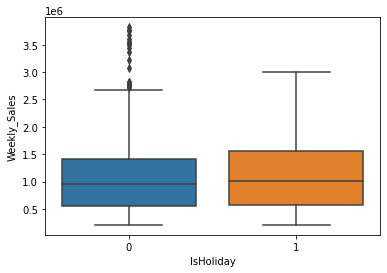

In [230]:
# montaremos um boxplot para verificarmos se há outliers

sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=sales_tot_features)

Como há uma diferença de apenas 7,84% entre as médias de vendas semanais de semanas com e sem feriado, e observamos que os boxplots estão parecidos, não havendo outliers nas semanas com feriado, não removeremos os dados das semanas com feriado de nossa análise.

In [241]:
# como esse será o data frame que utilizaremos daqui em diante para nosso modelo, renomearemos-no para 'df', para facilitar

df = sales_tot_features
df

,Store,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown
0,1,05/02/2010,0,1643690.90,42.31,2.572,211.096358,8.106,0.00
1,1,12/02/2010,1,1641957.44,38.51,2.548,211.242170,8.106,0.00
2,1,19/02/2010,0,1611968.17,39.93,2.514,211.289143,8.106,0.00
3,1,26/02/2010,0,1409727.59,46.63,2.561,211.319643,8.106,0.00
4,1,05/03/2010,0,1554806.68,46.50,2.625,211.350143,8.106,0.00
...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,0,713173.95,64.88,3.997,192.013558,8.684,9468.01
6431,45,05/10/2012,0,733455.07,64.89,3.985,192.170412,8.667,9659.00
6432,45,12/10/2012,0,734464.36,54.47,4.000,192.327265,8.667,6554.03
6433,45,19/10/2012,0,718125.53,56.47,3.969,192.330854,8.667,3982.42


<a class="anchor" id="chapter4"></a>
## 4. Modelagem 
    Daremos início ao nosso modelo de previsão de vendas.

<a class="anchor" id="section_4_1"></a>
##  Modelo Decision Tree Regression
    Daremos início à previsão por meio do modelo Decision Tree Regression, no qual o princípio do aprendizado de máquina é  por árvore de decisão. 
    Faremos um modelo no qual as vendas semanais será a variável dependente de uma outra variável de nosso conjunto de      dados.

<a class="anchor" id="section_4_1_1"></a>
### Vendas x Temperatura
Iniciaremos usando a variável Temperature como variável independente, ou seja, faremos uma previsão das vendas em função da temperatura. 

In [243]:
# criaremos uma série para cada variável desejada: a variável dependente será Y e a independente X

X = df['Temperature'].values
y = df['Weekly_Sales'].values

In [246]:
# Dividiremos cada série em duas: training e test. Uma será utilizada para treinar o modelo com seus dados, e a outra servirá para
# ser comparada com os resultados fornecidos pelo nosso modelo de previsão. Usaremos 5% (322 linhas) do df como teste.
# Importaremos a função train_test_split para fazermos isso

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [249]:
# Treinando nosso conjunto de dados no modelo

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [250]:
# Fornecimento da previsão da variável dependente (vendas semanais)

y_pred = regressor.predict(X_test.reshape(-1,1))

In [265]:
# Comparação dos valores previstos com os valores reais

comp = pd.DataFrame({'Valores reais':y_test.reshape(-1), 'Valores previstos':y_pred.reshape(-1)})
comp

,Valores reais,Valores previstos
0,446905.02,1.068224e+06
1,1743000.38,5.032953e+05
2,329467.82,5.583436e+05
3,520284.79,9.727417e+05
4,339976.65,8.140444e+05
...,...,...
317,1046782.52,1.061090e+06
318,593128.13,8.894607e+05
319,590636.38,1.795153e+06
320,2091663.20,1.033950e+06


In [266]:
# Mudaremos o formato da coluna 'Valores previstos', para visualizarmos o número completo e não em notação científica

comp['Valores previstos'] = comp['Valores previstos'].map(lambda x: '{:.2f}'.format(x)).astype(float)
comp

,Valores reais,Valores previstos
0,446905.02,1068223.68
1,1743000.38,503295.29
2,329467.82,558343.57
3,520284.79,972741.65
4,339976.65,814044.43
...,...,...
317,1046782.52,1061089.82
318,593128.13,889460.65
319,590636.38,1795152.73
320,2091663.20,1033950.03


<a class="anchor" id="section_4_1_1_1"></a>
### Medidas de avaliação do modelo Vendas x Temperatura

In [268]:
# Criaremos uma coluna com a diferença entre o valor previsto e o valor real 

comp['dif'] = comp['Valores previstos'] - comp['Valores reais']
comp

,Valores reais,Valores previstos,dif
0,446905.02,1068223.68,621318.66
1,1743000.38,503295.29,-1239705.09
2,329467.82,558343.57,228875.75
3,520284.79,972741.65,452456.86
4,339976.65,814044.43,474067.78
...,...,...,...
317,1046782.52,1061089.82,14307.30
318,593128.13,889460.65,296332.52
319,590636.38,1795152.73,1204516.35
320,2091663.20,1033950.03,-1057713.17


In [269]:
# média da soma das diferenças

comp['dif'].mean()

-9530.198354037233

A média é negativa, o que nos dá indícios de que o modelo é ruim

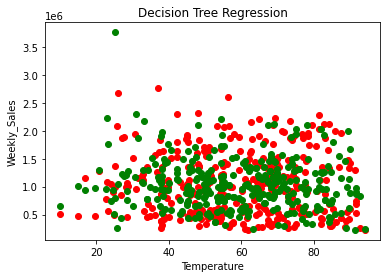

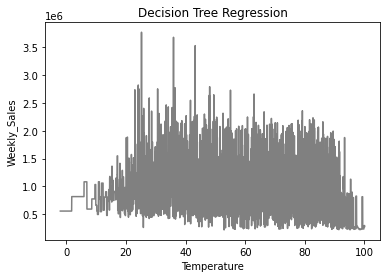

In [281]:
# Montagem de dois gráficos que mostram a relação entre as variáveis, um de dispersão e outro de linha

# gráfico de dispersão

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

# gráfico de linhas

plt.plot(X_grid, regressor.predict(X_grid), color = 'gray')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

In [310]:
# Montagem de um outro gráfico de linha 

fig = px.line(comp, y = ["Valores reais", "Valores previstos"])
fig.show()

 Os gráficos nos indicam que o modelo não é adequado para nossa previsão

In [289]:
# Cálculo de R^2, medida de quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, sendo 1 o ajuste perfeito.
# Cálculo do Erro Médio Absoluto, o valor médio absoluto da diferença entre os valores previstos e os valores reais
# Cálculo do Erro Quadrático Médio, a média dos quadrados dos erros
# Cálculo da raiz do Erro Quadrático Médio, que mede o mesmo que o EQM, mas na mesma unidade de medida que os valores trabalhados

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# cálculo do coeficiente R²
r2 = r2_score(y_test, y_pred)

# cálculo do erro médio absoluto (EMA)
ema = mean_absolute_error(y_test, y_pred)

# cálculo do erro quadrático médio (EQM)
eqm = mean_squared_error(y_test, y_pred)

# cálculo da raiz do erro quadrático médio (REQM)
reqm = np.sqrt(eqm)

print('Coeficiente R²: {:.4f}'.format(r2))
print('EMA:{:.2f}'.format(ema))
print('EQM:{:.2f}'.format(eqm))
print('REQM:{:.2f}'.format(reqm))

Coeficiente R²: -0.7638
EMA:605855.12
EQM:569237030172.59
REQM:754477.99


#### Analisando as medidas, avaliamos que o modelo é inadequado para nossa análise. O R^2 é negativo, ou seja, a linha de regressão está totalmente discondizente com o desejado, o que também podemos observar no gráfico obtido acima. O Erro Médio Absoluto e o Erro Quadrático Médio nos dizem que os erros estão altos, o que também nos leva a rejeitar a previsão obtida. Isso significa que pelo nosso modelo não encontramos uma correlação entre temperatura e nível de vendas.

<a class="anchor" id="section_4_1_2"></a>
### Vendas x Lojas
    Agora usaremos a mesma técnica porém alterando a variável independente para Store, ou seja, prever as vendas em função da loja, que varia de 1 a 45. Diferenciaremos as variáveis do modelo Vendas x Temperatura adicionando um '1' na frente delas

In [291]:
# criaremos uma série para cada variável desejada: a variável dependente será Y e a independente X

X1 = df['Store'].values
y1 = df['Weekly_Sales'].values

In [292]:
# Dividiremos cada série em duas: training e test. Uma será utilizada para treinar o modelo com seus dados, e a outra servirá para
# ser comparada com os resultados fornecidos pelo nosso modelo de previsão. Usaremos 5% (322 linhas) do df como teste.
# Importaremos a função train_test_split para fazermos isso

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.05)

In [293]:
# Treinando nosso conjunto de dados no modelo

regressor1 = DecisionTreeRegressor()
regressor1.fit(X1_train.reshape(-1,1), y1_train.reshape(-1,1))

DecisionTreeRegressor()

In [294]:
# Fornecimento da previsão da variável dependente (vendas semanais)

y1_pred = regressor.predict(X1_test.reshape(-1,1))

In [295]:
# Comparação dos valores previstos com os valores reais

comp1 = pd.DataFrame({'Valores reais':y1_test.reshape(-1), 'Valores previstos':y1_pred.reshape(-1)})
comp1

,Valores reais,Valores previstos
0,938861.77,913755.120
1,303438.24,609736.120
2,655318.26,1010711.080
3,1336522.92,1083657.610
4,559285.35,1104858.215
...,...,...
317,1550229.22,558027.770
318,958487.75,960645.830
319,1744879.06,1365546.690
320,713117.66,593875.460


<a class="anchor" id="section_4_1_1_2"></a>
### Medidas de avaliação do modelo Vendas x Lojas

In [296]:
# Criaremos uma coluna com a diferença entre o valor previsto e o valor real 

comp1['dif'] = comp1['Valores previstos'] - comp1['Valores reais']
comp1

,Valores reais,Valores previstos,dif
0,938861.77,913755.120,-25106.650
1,303438.24,609736.120,306297.880
2,655318.26,1010711.080,355392.820
3,1336522.92,1083657.610,-252865.310
4,559285.35,1104858.215,545572.865
...,...,...,...
317,1550229.22,558027.770,-992201.450
318,958487.75,960645.830,2158.080
319,1744879.06,1365546.690,-379332.370
320,713117.66,593875.460,-119242.200


In [297]:
# média da soma das diferenças

comp1['dif'].mean()

-108480.55933488607

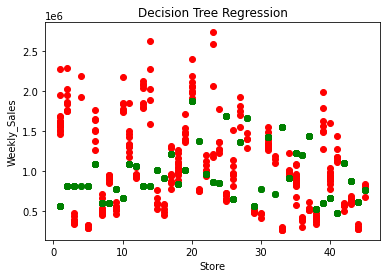

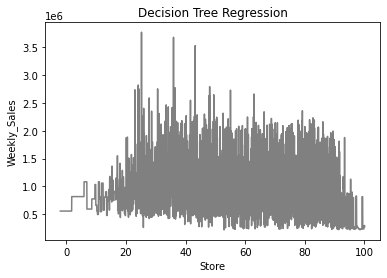

In [299]:
# Montagem de dois gráficos que mostram a relação entre as variáveis, um de dispersão e outro de linha

# gráfico de dispersão

X1_grid = np.arange(min(X), max(X), 0.01)
X1_grid = X1_grid.reshape((len(X1_grid), 1))
plt.scatter(X1_test, y1_test, color = 'red')
plt.scatter(X1_test, y1_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

# gráfico de linhas

plt.plot(X1_grid, regressor.predict(X1_grid), color = 'gray')
plt.title('Decision Tree Regression')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

In [311]:
# Montagem de um outro gráfico de linha 

fig1 = px.line(comp1, y = ["Valores reais", "Valores previstos"])
fig1.show()

In [301]:
# Cálculo de R^2, medida de quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, sendo 1 o ajuste perfeito.
# Cálculo do Erro Médio Absoluto, o valor médio absoluto da diferença entre os valores previstos e os valores reais
# Cálculo do Erro Quadrático Médio, a média dos quadrados dos erros
# Cálculo da raiz do Erro Quadrático Médio, que mede o mesmo que o EQM, mas na mesma unidade de medida que os valores trabalhados

# cálculo do coeficiente R²
r21 = r2_score(y1_test, y1_pred)

# cálculo do erro médio absoluto (EMA)
ema1 = mean_absolute_error(y1_test, y1_pred)

# cálculo do erro quadrático médio (EQM)
eqm1 = mean_squared_error(y1_test, y1_pred)

# cálculo da raiz do erro quadrático médio (REQM)
reqm1 = np.sqrt(eqm1)

print('Coeficiente R²: {:.4f}'.format(r21))
print('EMA:{:.2f}'.format(ema1))
print('EQM:{:.2f}'.format(eqm1))
print('REQM:{:.2f}'.format(reqm1))

Coeficiente R²: -0.3650
EMA:497861.77
EQM:411970772533.10
REQM:641849.49


#### A análise é similar à obtida no modelo Vendas x Temperatura, de que o modelo não é adequado.

####  Vimos que os dois modelos não foram suficientes para nossas expectativas, portanto partiremos para outra técnica de modelo de regressão. Esse fracasso pode ser devido a um problema do Modelo Decision Tree Regression chamado Overfitting, no qual o modelo se ajusta bem à base de treino mas apresenta um desempenho ruim na base de teste. Isso pode ocorrer pois o modelo se ajustou à especificidades da base de treino. Outros problemas podem ser devido à escolha das variáveis do modelo, isto é, pode ser que Temperatura e Lojas não sejam variáveis que sirvam para prever as vendas.

<a class="anchor" id="section_4_2"></a>
## Modelo Random Forest Regression 
    O princípio desse método é aplicar múltiplas árvores de regressão (Modelo Decision Tree Regression) sobre o conjunto de dados e tomar uma média.

<a class="anchor" id="section_4_2_1"></a>
### Modelo Vendas x Temperatura

In [341]:
# importação de função necessária para o modelo

from sklearn.ensemble import RandomForestRegressor

# criando uma variável para RandomForestRegressor()
rf_regressor = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [342]:
# treinando nosso conjunto de dados no modelo
# note que usaremos as mesmas series utilizadas anteriormente, no modelo Vendas x Temperature da Tree Regression

# y_train está como uma matriz unidimensional (coluna) como valor de y em vez de um array unidimensional, que é o esperado pelo
# algoritmo, portanto iremos transformá-la
y_train = y_train.ravel()

rf_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\luisz\AppData\Local\Temp\ipykernel_32480\2051421223.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=500,
                      random_state=18)

Obs: mesmo aplicar a função ravel, o warning continua

In [350]:
# fornecimento da previsão da variável dependente (vendas semanais)
y_pred_forest = rf_regressor.predict(X_test.reshape(-1,1))

In [351]:
# Comparação dos valores previstos com os valores reais

comp_forest = pd.DataFrame({'Valores reais':y_test.reshape(-1), 'Valores previstos':y_pred_forest.reshape(-1)})
comp_forest

,Valores reais,Valores previstos
0,446905.02,1.122386e+06
1,1743000.38,1.044083e+06
2,329467.82,1.028720e+06
3,520284.79,9.332489e+05
4,339976.65,1.050005e+06
...,...,...
317,1046782.52,1.052424e+06
318,593128.13,1.012355e+06
319,590636.38,9.510729e+05
320,2091663.20,1.029267e+06


In [352]:
# Mudaremos o formato da coluna 'Valores previstos', para visualizarmos o número completo e não em notação científica

comp_forest['Valores previstos'] = comp_forest['Valores previstos'].map(lambda x: '{:.2f}'.format(x)).astype(float)
comp_forest

,Valores reais,Valores previstos
0,446905.02,1122386.35
1,1743000.38,1044083.01
2,329467.82,1028719.51
3,520284.79,933248.91
4,339976.65,1050005.45
...,...,...
317,1046782.52,1052423.63
318,593128.13,1012355.30
319,590636.38,951072.91
320,2091663.20,1029267.43


In [353]:
# Plotando gráfico de comparação: azul são os dados reais e vermelho a previsão
fig = px.line(comp_forest, y=['Valores reais','Valores previstos'])
fig.show()

Observamos que a regressão obtida não é satisfatória, pelo gráfico.

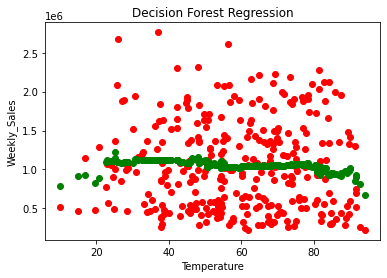

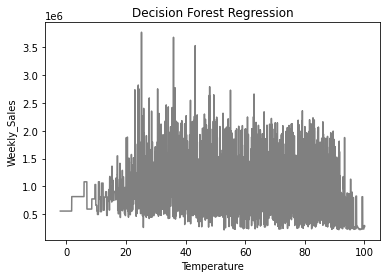

In [361]:
# Montagem de dois gráficos que mostram a relação entre as variáveis, um de dispersão e outro de linha

# gráfico de dispersão

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred_forest, color = 'green')
plt.title('Decision Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

# gráfico de linhas

plt.plot(X1_grid, regressor.predict(X_grid), color = 'gray')
plt.title('Decision Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

Novamente encontramos resultados insatisfatórios.

In [364]:
# Cálculo de R^2, medida de quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, sendo 1 o ajuste perfeito.
# Cálculo do Erro Médio Absoluto, o valor médio absoluto da diferença entre os valores previstos e os valores reais
# Cálculo do Erro Quadrático Médio, a média dos quadrados dos erros
# Cálculo da raiz do Erro Quadrático Médio, que mede o mesmo que o EQM, mas na mesma unidade de medida que os valores trabalhados

# cálculo do coeficiente R²
r2 = r2_score(y_test, y_pred_forest)

# cálculo do erro médio absoluto (EMA)
ema = mean_absolute_error(y_test, y_pred_forest)

# cálculo do erro quadrático médio (EQM)
eqm = mean_squared_error(y_test, y_pred_forest)

# cálculo da raiz do erro quadrático médio (REQM)
reqm = np.sqrt(eqm)

print('Coeficiente R²: {:.4f}'.format(r2))
print('EMA:{:.2f}'.format(ema))
print('EQM:{:.2f}'.format(eqm))
print('REQM:{:.2f}'.format(reqm))

Coeficiente R²: 0.0041
EMA:474355.87
EQM:321429363523.41
REQM:566947.41


Apesar de agora o R^2 ser positivo, ainda é muito baixo. Os outros medidores também indicam que o modelo é insatisfatório para nosso problema.

Há fortes indícios de que a variável Temperatura não está correlacionada com o índice de vendas, portanto partiremos para a variável Lojas.

<a class="anchor" id="section_4_2_2"></a>
### Modelo Vendas x Lojas 

In [ ]:
# criando uma variável para RandomForestRegressor()
rf_regressor = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [356]:
# treinando nosso conjunto de dados no modelo
# note que usaremos as mesmas series utilizadas anteriormente, no modelo Vendas x Lojas da Tree Regression

# y1_train está como uma matriz unidimensional (coluna) como valor de y em vez de um array unidimensional, que é o esperado pelo
# algoritmo, portanto iremos transformá-la
y1_train = y1_train.ravel()

rf_regressor.fit(X1_train.reshape(-1,1), y1_train.reshape(-1,1))

C:\Users\luisz\AppData\Local\Temp\ipykernel_32480\3546062657.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=500,
                      random_state=18)

Obs: mesmo aplicar a função ravel, o warning continua

In [357]:
# fornecimento da previsão da variável dependente (vendas semanais)
y1_pred_forest = rf_regressor.predict(X1_test.reshape(-1,1))

In [358]:
# Comparação dos valores previstos com os valores reais

comp1_forest = pd.DataFrame({'Valores reais':y1_test.reshape(-1), 'Valores previstos':y1_pred_forest.reshape(-1)})
comp1_forest

,Valores reais,Valores previstos
0,938861.77,8.899486e+05
1,303438.24,3.622004e+05
2,655318.26,8.991305e+05
3,1336522.92,1.369305e+06
4,559285.35,5.603483e+05
...,...,...
317,1550229.22,1.545573e+06
318,958487.75,1.272964e+06
319,1744879.06,1.272964e+06
320,713117.66,8.211324e+05


In [359]:
# Mudaremos o formato da coluna 'Valores previstos', para visualizarmos o número completo e não em notação científica

comp1_forest['Valores previstos'] = comp1_forest['Valores previstos'].map(lambda x: '{:.2f}'.format(x)).astype(float)
comp1_forest

,Valores reais,Valores previstos
0,938861.77,889948.65
1,303438.24,362200.45
2,655318.26,899130.51
3,1336522.92,1369305.36
4,559285.35,560348.29
...,...,...
317,1550229.22,1545572.78
318,958487.75,1272964.37
319,1744879.06,1272964.37
320,713117.66,821132.37


In [360]:
# Plotando gráfico de comparação: azul são os dados reais e vermelho a previsão
fig = px.line(comp1_forest, y=['Valores reais','Valores previstos'])
fig.show()

O gráfico nos indica que a previsão está boa, ou seja, que o modelo está correto.

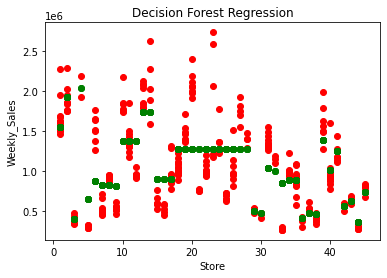

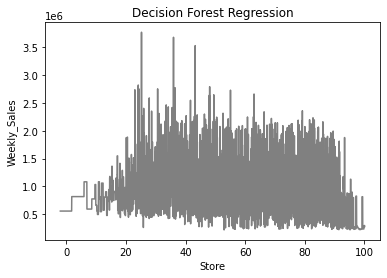

In [363]:
# Montagem de dois gráficos que mostram a relação entre as variáveis, um de dispersão e outro de linha

# gráfico de dispersão

X1_grid = np.arange(min(X), max(X), 0.01)
X1_grid = X1_grid.reshape((len(X1_grid), 1))
plt.scatter(X1_test, y1_test, color = 'red')
plt.scatter(X1_test, y1_pred_forest, color = 'green')
plt.title('Decision Forest Regression')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

# gráfico de linhas

plt.plot(X1_grid, regressor.predict(X1_grid), color = 'gray')
plt.title('Decision Forest Regression')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

O gráfico de dispersão é um gráfico difícil de se analisar para esse caso, provavelmente pois os valores reais possuem muito mais observações.

In [365]:
# Cálculo de R^2, medida de quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, sendo 1 o ajuste perfeito.
# Cálculo do Erro Médio Absoluto, o valor médio absoluto da diferença entre os valores previstos e os valores reais
# Cálculo do Erro Quadrático Médio, a média dos quadrados dos erros
# Cálculo da raiz do Erro Quadrático Médio, que mede o mesmo que o EQM, mas na mesma unidade de medida que os valores trabalhados

# cálculo do coeficiente R²
r2 = r2_score(y1_test, y1_pred_forest)

# cálculo do erro médio absoluto (EMA)
ema = mean_absolute_error(y1_test, y1_pred_forest)

# cálculo do erro quadrático médio (EQM)
eqm = mean_squared_error(y1_test, y1_pred_forest)

# cálculo da raiz do erro quadrático médio (REQM)
reqm = np.sqrt(eqm)

print('Coeficiente R²: {:.4f}'.format(r2))
print('EMA:{:.2f}'.format(ema))
print('EQM:{:.2f}'.format(eqm))
print('REQM:{:.2f}'.format(reqm))

Coeficiente R²: 0.6316
EMA:237277.88
EQM:111175808270.12
REQM:333430.36


A estatística R^2 foi alta, o que nos indica um sucesso relativo do modelo. É um indício também que a variável Lojas é explicativa para a variável Vendas, o que é bom, pois nosso problema é obter uma previsão de vendas por loja.
Começamos a nos encaminhar para nossa previsão final.

<a class="anchor" id="section_4_2_3"></a>
## Adição de Variáveis
    Nosso modelo de maior sucesso foi o Vendas x Lojas utilizando o modelo Random Forest Regression, no qual obtemos a maior estatistica R^2. Porém, estamos usando apenas a variável Lojas como explicativa. A adição de mais variáveis no modelo enriquecerá nossa previsão.

<a class="anchor" id="section_4_2_3_1"></a>
### Pré-tratamento para a adição

In [366]:
# visualização do data frame de interesse

df

,Store,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown
0,1,05/02/2010,0,1643690.90,42.31,2.572,211.096358,8.106,0.00
1,1,12/02/2010,1,1641957.44,38.51,2.548,211.242170,8.106,0.00
2,1,19/02/2010,0,1611968.17,39.93,2.514,211.289143,8.106,0.00
3,1,26/02/2010,0,1409727.59,46.63,2.561,211.319643,8.106,0.00
4,1,05/03/2010,0,1554806.68,46.50,2.625,211.350143,8.106,0.00
...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,0,713173.95,64.88,3.997,192.013558,8.684,9468.01
6431,45,05/10/2012,0,733455.07,64.89,3.985,192.170412,8.667,9659.00
6432,45,12/10/2012,0,734464.36,54.47,4.000,192.327265,8.667,6554.03
6433,45,19/10/2012,0,718125.53,56.47,3.969,192.330854,8.667,3982.42


In [367]:
# Até agora trabalhamos com um data frame que contemplava apenas os df's originais sales e features. 
# Como queremos um número grande de variáveis para enriquecer nosso modelo, iremos uni-lo ao df original stores
# df2 será nosso data frame de interesse

df2 = pd.merge(df, stores, how='inner', on=['Store'])
df2

,Store,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown,Type,Size
0,1,05/02/2010,0,1643690.90,42.31,2.572,211.096358,8.106,0.00,A,151315
1,1,12/02/2010,1,1641957.44,38.51,2.548,211.242170,8.106,0.00,A,151315
2,1,19/02/2010,0,1611968.17,39.93,2.514,211.289143,8.106,0.00,A,151315
3,1,26/02/2010,0,1409727.59,46.63,2.561,211.319643,8.106,0.00,A,151315
4,1,05/03/2010,0,1554806.68,46.50,2.625,211.350143,8.106,0.00,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,0,713173.95,64.88,3.997,192.013558,8.684,9468.01,B,118221
6431,45,05/10/2012,0,733455.07,64.89,3.985,192.170412,8.667,9659.00,B,118221
6432,45,12/10/2012,0,734464.36,54.47,4.000,192.327265,8.667,6554.03,B,118221
6433,45,19/10/2012,0,718125.53,56.47,3.969,192.330854,8.667,3982.42,B,118221


In [370]:
# informações de df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   IsHoliday     6435 non-null   int64  
 3   Weekly_Sales  6435 non-null   float64
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   MarkDown      6435 non-null   float64
 9   Type          6435 non-null   object 
 10  Size          6435 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 603.3+ KB


In [374]:
# observamos que temos variáveis do tipo object em nosso data frame de interesse
# substituíremos o tipo da loja (Type) para variáveis numéricas
# verificaremos quantos tipos de loja temos

df2.groupby(by=["Type"]).sum()

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown,Size
Type,,,,,,,,,
A,69927,220,4.331015e+09,191996.06,10522.116,548914.617797,24555.284,24866258.14,557621350
B,44616,170,2.000701e+09,140447.97,8212.274,408738.960879,19248.337,14873602.84,245994606
C,33462,60,4.055035e+08,57927.41,2878.245,146453.385741,7670.916,593132.26,34784750


In [377]:
# substituíremos da seguinte forma: A será 1, B será 2 e C será 3

df2["Type"].replace({"A": 1, "B": 2, "C": 3}, inplace=True)
df2

,Store,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown,Type,Size
0,1,05/02/2010,0,1643690.90,42.31,2.572,211.096358,8.106,0.00,1,151315
1,1,12/02/2010,1,1641957.44,38.51,2.548,211.242170,8.106,0.00,1,151315
2,1,19/02/2010,0,1611968.17,39.93,2.514,211.289143,8.106,0.00,1,151315
3,1,26/02/2010,0,1409727.59,46.63,2.561,211.319643,8.106,0.00,1,151315
4,1,05/03/2010,0,1554806.68,46.50,2.625,211.350143,8.106,0.00,1,151315
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,0,713173.95,64.88,3.997,192.013558,8.684,9468.01,2,118221
6431,45,05/10/2012,0,733455.07,64.89,3.985,192.170412,8.667,9659.00,2,118221
6432,45,12/10/2012,0,734464.36,54.47,4.000,192.327265,8.667,6554.03,2,118221
6433,45,19/10/2012,0,718125.53,56.47,3.969,192.330854,8.667,3982.42,2,118221


<a class="anchor" id="section_4_2_3_2"></a>
### Modelo Random Forest Regression usando todas as variáveis do conjunto de dados 

In [384]:
# agora aplicaremos o modelo para todas as variáveis, não apenas stores
# não trabalharemos com 'Date', pois não consegui achar um formato que funcionasse

variaveis = ['Store','IsHoliday', 'Temperature', 'Fuel_Price','CPI', 'Unemployment', 'MarkDown', 'Type', 'Size']

# novamente criaremos uma série para cada variável desejada: a variável dependente será Y e a independente X

X_new = df2[variaveis].values
y_new = df2['Weekly_Sales'].values

In [390]:
X_new.shape

(6435, 9)

In [392]:
y_new.shape

(6435,)

In [385]:
# novamente dividiremos cada série em duas: training e test. Uma será utilizada para treinar o modelo com seus dados, e a outra
#servirá para ser comparada com os resultados fornecidos pelo nosso modelo de previsão. Usaremos 5% (322 linhas) do df como teste.
# Importaremos a função train_test_split para fazermos isso

from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.05)

In [386]:
# novamente criaremos uma variável para RandomForestRegressor() (não precisávamos, mas faremos para demonstrar o método)
rf_regressor = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [393]:
# treinando nosso conjunto de dados no modelo

# y_train_new está como uma matriz unidimensional (coluna) como valor de y em vez de um array unidimensional, que é o esperado pelo
# algoritmo, portanto iremos transformá-la
#y_train_new = y_train_new.ravel()

rf_regressor.fit(X_train_new, y_train_new)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [394]:
# fornecimento da previsão da variável dependente (vendas semanais)
y_pred_forest_new = rf_regressor.predict(X_test_new)

In [395]:
# Comparação dos valores previstos com os valores reais

comp_forest_new = pd.DataFrame({'Valores reais':y_test_new, 'Valores previstos':y_pred_forest_new})
comp_forest_new

,Valores reais,Valores previstos
0,1218688.09,1.367574e+06
1,762620.94,8.914063e+05
2,1466164.49,1.393736e+06
3,506789.66,6.292166e+05
4,596218.24,7.701341e+05
...,...,...
317,469787.38,4.472573e+05
318,691200.33,7.810617e+05
319,836707.85,9.664380e+05
320,740259.63,7.529414e+05


In [396]:
# Mudaremos o formato da coluna 'Valores previstos', para visualizarmos o número completo e não em notação científica

comp_forest_new['Valores previstos'] = comp_forest_new['Valores previstos'].map(lambda x: '{:.2f}'.format(x)).astype(float)
comp_forest_new

,Valores reais,Valores previstos
0,1218688.09,1367574.00
1,762620.94,891406.25
2,1466164.49,1393736.27
3,506789.66,629216.64
4,596218.24,770134.05
...,...,...
317,469787.38,447257.28
318,691200.33,781061.68
319,836707.85,966437.99
320,740259.63,752941.42


In [397]:
# Plotando gráfico de comparação: azul são os dados reais e vermelho a previsão
fig = px.line(comp_forest_new, y=['Valores reais','Valores previstos'])
fig.show()

O gráfico nos indica que o modelo está bom, que a previsão de vendas está muito próxima da realidade.

In [399]:
# Cálculo de R^2, medida de quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, sendo 1 o ajuste perfeito.
# Cálculo do Erro Médio Absoluto, o valor médio absoluto da diferença entre os valores previstos e os valores reais
# Cálculo do Erro Quadrático Médio, a média dos quadrados dos erros
# Cálculo da raiz do Erro Quadrático Médio, que mede o mesmo que o EQM, mas na mesma unidade de medida que os valores trabalhados

# cálculo do coeficiente R²
r2 = r2_score(y_test_new, y_pred_forest_new)

# cálculo do erro médio absoluto (EMA)
ema = mean_absolute_error(y_test_new, y_pred_forest_new)

# cálculo do erro quadrático médio (EQM)
eqm = mean_squared_error(y_test_new, y_pred_forest_new)

# cálculo da raiz do erro quadrático médio (REQM)
reqm = np.sqrt(eqm)

print('Coeficiente R²: {:.4f}'.format(r2))
print('EMA:{:.2f}'.format(ema))
print('EQM:{:.2f}'.format(eqm))
print('REQM:{:.2f}'.format(reqm))

Coeficiente R²: 0.8503
EMA:155460.39
EQM:52084846089.38
REQM:228221.05


A estatística R^2 obtida é alta, o que fortalece a verificação de sucesso do modelo.

In [406]:
# EMA, EQM e REQM são estatísticas de valor de erro, portanto para interpretá-las iremos visualizá-las como proporção da média
# de Weekly_Sales. Não iremos usar EQM, pois já usaremos sua raiz quadrada.

ema_prop = ema/df2["Weekly_Sales"].mean()
reqm_prop = reqm/df2["Weekly_Sales"].mean()

print(f"Proporção do Erro Médio Absoluto em relação à média das Vendas Semanais: {round(ema_prop, ndigits=4)*100}%")
print(f"Proporção do Erro Quadrático Médio em relação à média das Vendas Semanais: {round(reqm_prop, ndigits=4)*100}%")

Proporção do Erro Médio Absoluto em relação à média das Vendas Semanais: 14.85%
Proporção do Erro Quadrático Médio em relação à média das Vendas Semanais: 21.8%


<a class="anchor" id="chapter5"></a>
# 5. Avaliação

   Como mostrado acima, o modelo de maior precisão é o de Random Forest Regression utilizando todas as variáveis como variáveis explicativas (exceto 'Date'). No gráfico, vemos que a linha dos valores previstos acompanha de forma satisfatória a linha dos valores reais, ou seja, que nossa previsão de vendas é condizente com a realidade. O coeficiente R^2 fortalece nossa comprovação de sucesso, com um valor de 0,85. Concluímos que esse modelo é satisfatório para a previsão de vendas por loja. Se o usuário do modelo inputar apenas o número da loja no modelo, o resultado já será satisfatório, com um R^2 de 0,63, porém se ele souber todas as outras variáveis, o modelo fornecerá um resultado muito próximo da realidade.
   
   O valor encontrado de 14,85% para o Erro Médio Absoluto é um indicador de que o erro do modelo é relativamente baixo, enquanto que o valor de 21,8% demonstra a existência de períodos com erros maiores.

O modelo poderia ser melhor se a variável 'Date' fosse inputada, e se outros métodos de aprendizagem de máquina fossem aplicados, como a Verificação Cruzada, que "é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados" (KOHAVI, R). É uma técnica útil para evitar overfitting, problema explicado no modelo Decision Tree Regression. Outras técnicas que poderíamos aplicar seriam: Redes Neurais, Gradient Boosting, Redes Bayesianas e Máquinas de Vetor de Suporte (SVM).

Uma outra prática que enriqueceria nosso modelo seria uma análise mais profunda sobre a verificação da existência de outliers, assim como a inclusão da divisão das lojas por departamentos no modelo.

<a class="anchor" id="chapter6"></a>
# 6. Referências

"Machine Learning Basics: Decision Tree Regression" por Sachin Malhotra e Rohan Kapoor, Towards Data Science. Disponível em: https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda. Acesso em 13 de abril de 2023.

"Random Forest Regression" por Punit Jajodia, Towards Data Science. Disponível em: https://towardsdatascience.com/random-forest-regression-5f605132d19d. Acesso em 13 de abril de 2023.

"Aula #5 - Resolva o Titanic Como um Campeão do Kaggle", YouTube. Disponível em: https://youtu.be/4I7YMPxps1k. Acesso em 13 de abril de 2023.

"Aplicando os algoritmos Árvore de Regressão e Random Forest com Python", YouTube. Disponível em: https://youtu.be/ho1eI54ykoU. Acesso em 13 de abril de 2023.

KOHAVI, R. A study of cross-validation and bootstrap for accuracy estimation and model selection. In: International joint Conference on artificial intelligence. [S.l.: s.n.], 1995. v. 14, p. 1137–1145.
